Importing libraries

In [19]:
#define PATH_DATASET /home/sbvatan/Documents/Python/DL_bootcamp/Project/UrbanSound8K
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import librosa as rosa
import librosa.display as rosaDisp
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import cv2
import os
import csv
import glob

Read CSV, maybe useful later

In [20]:
dataCSV = pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")

Read the .wav file using librosa; refs:
https://librosa.org/doc/main/generated/librosa.load.html

In [21]:
def read(filePath):
    audio , audioSr= rosa.load(filePath,sr=11025)
    return (audio , audioSr)

Trying to implement spectrogram function; 

In [22]:
def createSpectrogram(audio , audioSr):
    spec_conv = rosa.amplitude_to_db(rosa.feature.melspectrogram(audio, sr=audioSr, n_mels=128),ref=np.max)
    return spec_conv

Display spectogram; refs:
https://github.com/SultanSaribas/SpeechRecognition/blob/master/CNN/CNN

In [23]:
def displaySpectogram(spectogram):
    rosaDisp.specshow(spectogram, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')

Save spectogram as image file; refs:
https://stackoverflow.com/questions/52432731/store-the-spectrogram-as-image-in-python

In [24]:
def spectogramSave(dirPath,fileName,audio):
    saveDirPath=dirPath.replace("audio","spectogram")
    savefileName = fileName.replace(".wav",".png")
    
    window_size = 1024
    window = np.hanning(window_size)
    stft  = rosa.core.spectrum.stft(audio, n_fft=window_size, hop_length=512, window=window)
    out = 2 * np.abs(stft) / np.sum(window)

    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    p = rosaDisp.specshow(rosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
    fig.savefig(saveDirPath+"/"+savefileName)


Create, display and save spectogram; refs: 
https://stackoverflow.com/questions/8384737/extract-file-name-from-path-no-matter-what-the-os-path-format

/home/sbvatan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Pass y=[-9.7086398e-05 -1.8610415e-04 -1.4090347e-04 ... -4.0238660e-02
 -4.2696159e-02 -5.0760370e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


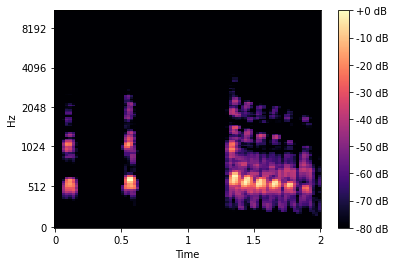

In [25]:
filePath="UrbanSound8K/audio/fold1/101415-3-0-2.wav"
dirPath=os.path.dirname(os.path.realpath(filePath))
fileName=os.path.basename(os.path.realpath(filePath))
saveDirPath=dirPath.replace("audio","spectogram")
savefileName = fileName.replace(".wav",".png")
(audio , audioSr) = read(filePath)
spectogram=createSpectrogram(audio , audioSr)
spectogram.shape
displaySpectogram(spectogram)
spectogramSave(saveDirPath,savefileName,audio)

Use openCV to turn spectogram grayscale, resize and normalize it; refs:
https://techtutorialsx.com/2018/06/02/python-opencv-converting-an-image-to-gray-scale/


In [34]:
currentSpectogram=cv2.imread(saveDirPath+"/"+savefileName)
grayCurrentSpectogram = cv2.cvtColor(currentSpectogram, cv2.COLOR_BGR2GRAY)
scaleFactor=2
grayCurrentSpectogram = cv2.resize(grayCurrentSpectogram, (grayCurrentSpectogram.shape[1]*scaleFactor,grayCurrentSpectogram.shape[0]*scaleFactor),interpolation = cv2.INTER_AREA)
cv2.imshow("Greyscaled spectogram "+savefileName,grayCurrentSpectogram)
cv2.waitKey(0)
cv2.destroyAllWindows()